# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [3]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [4]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

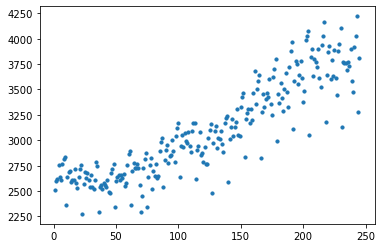

In [5]:
plt.scatter(xvals, yvals, s=10)
plt.show()

## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta1: 2367.4, beta2: 5.9390
MSE: 45323.6, R^2: 0.7956113


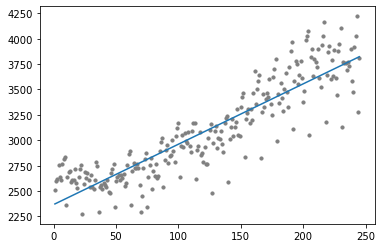

In [6]:
from utils import PolynomialRegressor # See code copied to end of notebook

regressor = PolynomialRegressor()

beta, r2, res = regressor.polyreg(np.swapaxes(np.array((xvals, yvals)), 0, 1), 1)
print(f'beta1: {beta[0]:.1f}, beta2: {beta[1]:.4f}')

pred_lin = regressor.predict(xvals, beta)

plt.plot(xvals, pred_lin)
plt.scatter(xvals, yvals, c='gray', s=10)

print(f'MSE: {np.sum(res.T@res)/len(yvals):.1f}, R^2: {r2:.7f}')
plt.show()

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

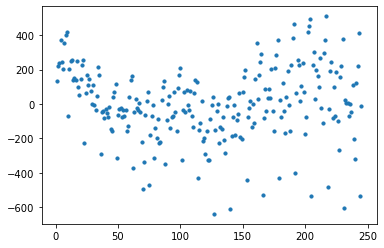

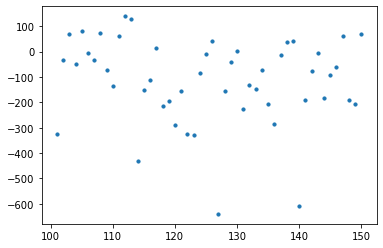

In [7]:
# Scatter plot
plt.scatter(xvals, res, s=10)
plt.show()

# Scatter plot (zoomed in)
plt.scatter(xvals[100:150], res[100:150], s=10)
plt.show()

There appears to be a periodic component with an approximate period of 12 intervals (about one year).

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


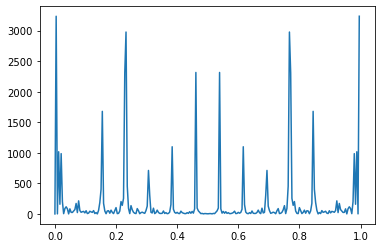

In [8]:
T = 28 # in days, from the table

periodgram = np.abs(np.fft.fft(res, N)/N)**2
freqs = np.linspace(0, N-1, N)/(N) # in 1/28 days
plt.plot(freqs, periodgram)
plt.show()

In [9]:
max_p = np.max(periodgram)

sig_freqs = []
for i in range(len(periodgram)):
    if periodgram[i] > 0.5*max_p:
        sig_freqs.append(freqs[i])

sig_freqs = sig_freqs[:len(sig_freqs)//2] # Removing all the N-k frequencies

print('Significant frequencies:', sig_freqs)

Significant frequencies: [0.004081632653061225, 0.15510204081632653, 0.22857142857142856, 0.23265306122448978, 0.46122448979591835]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

In [10]:
from utils import DFTRegressor # See code copied to end of notebook

regressor = DFTRegressor()
beta, r2, res_dft = regressor.fit(np.swapaxes(np.array((xvals, res)), 0, 1), sig_freqs)
print('Regression coefficients:', list(map(lambda x: round(x, 3), beta)))
print(f'MSE: {np.sum(res.T@res)/len(yvals):.3f}, R^2: {r2:.3f}')

Regression coefficients: [-51.253, 101.556, 61.628, -54.006, -15.581, -94.797, 81.659, 72.381, 32.472, 90.589]
MSE: 45323.636, R^2: 0.552


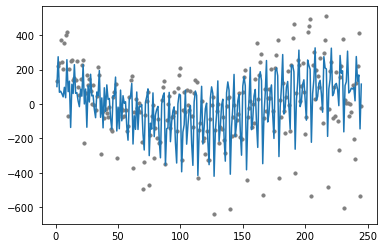

In [11]:
pred_dft = regressor.predict(xvals, beta, sig_freqs)

plt.plot(xvals, pred_dft)
plt.scatter(xvals, res, c='gray', s=10)
plt.show()

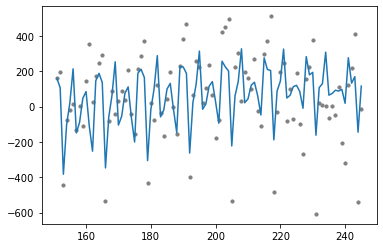

In [12]:
s, e = (150, 250)

plt.plot(xvals[s:e], pred_dft[s:e])
plt.scatter(xvals[s:e], res[s:e], c='gray', s=10)

plt.show()

## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

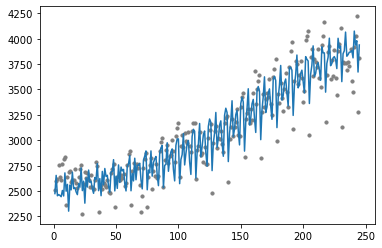

MSE: 20297.501, R^2: 0.908


In [13]:
predictions = pred_lin + pred_dft

plt.plot(xvals, predictions)
plt.scatter(xvals, yvals, c='gray', s=10)
plt.show()

res = yvals - predictions
res_0 = yvals - np.mean(yvals)*np.ones(xvals.shape[0])
sse_0 = res_0 @ res_0
print(f'MSE: {np.sum(res.T@res)/len(yvals):.3f}, R^2: {1-np.sum(res@res)/sse_0:.3f}')

There is a marked improvement over the linear model in terms of capturing the general trend. The combined model tracks the data trends and the yearly trends. The R^2 score increased significantly as a result

The MSE for the residual fit was exactly the same as that of the linear fit, which was an unexpected result. This could have been due to an implementation error or some other explanation. However, the resulting model, graphically, seems about right.

### Additional Notes

In [ ]:
#utils.py

import numpy as np

class PolynomialRegressor:
    def residual(self, X, y, beta):
        return y - X@beta

    def sse(self, X, y, beta):
        res = self.residual(X, y, beta)
        return res.T @ res

    def polyreg(self, data_matrix, k):
        k = len(data_matrix)-1 if k >= len(data_matrix) else k

        x = np.swapaxes(data_matrix, 0, 1)[0]
        y = np.swapaxes(data_matrix, 0, 1)[1]
        
        # Generate X
        X = np.array(list(map(lambda xpt: [xpt**power for power in range(k+1)], x)))

        # Calculate beta
        beta = np.linalg.inv(X.T@X)@X.T@y

        # Get SSE_0
        res_0 = y - np.mean(y)*np.ones(x.shape[0])
        sse_0 = res_0 @ res_0

        return beta, (1-self.sse(X, y, beta)/sse_0), self.residual(X, y, beta)

    def predict(self, x, beta):
        return beta @ np.array(list(map(lambda xpt: [xpt**power for power in range(len(beta))], x))).T

class DFTRegressor:
    def residual(self, X, y, beta):
        return y - X@beta

    def sse(self, X, y, beta):
        res = self.residual(X, y, beta)
        return res.T @ res

    def fit(self, data_matrix, freqs):
        x = np.swapaxes(data_matrix, 0, 1)[0]
        y = np.swapaxes(data_matrix, 0, 1)[1]
        
        # Generate X
        sincos = (lambda x: np.sin(x), lambda x: np.cos(x))
        X = np.array(list(map(lambda xpt: [f(w*2*np.pi*xpt) for w in freqs for f in sincos], x)))

        # Calculate beta
        beta = np.linalg.inv(X.T@X)@X.T@y

        # Get SSE_0
        res_0 = y - np.mean(y)*np.ones(x.shape[0])
        sse_0 = res_0 @ res_0

        return beta, (1-self.sse(X, y, beta)/sse_0), self.residual(X, y, beta)

    def predict(self, x, beta, freqs):
        sincos = (lambda x: np.sin(x), lambda x: np.cos(x))
        return beta @ np.array(list(map(lambda xpt: [f(w*2*np.pi*xpt) for w in freqs for f in sincos], x))).T